### Downloading all Dependencies 

In [76]:
# Importing Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Checking the GPU
assert len(tf.config.list_physical_devices("GPU")) > 0

### MNIST Dataset 

In [77]:
# Loading the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

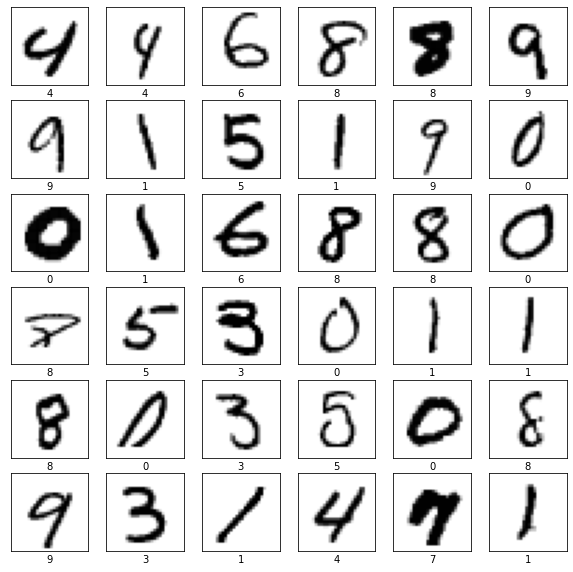

In [78]:
# Visualizing some of the Images and corresponding labels
plt.figure(figsize=(10, 10))
random_inds = np.random.choice(60000, 36)
for i in range(36):
  plt.subplot(6, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_ind = random_inds[i]
  plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
  plt.xlabel(train_labels[image_ind])

### Neural Network for Handwritten Digit Classification

In [79]:
def build_model():
  model = tf.keras.Sequential([
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(128, activation=tf.nn.relu),
                               tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return model

model = build_model()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])


In [80]:
# Defining Batch_size and number of epochs
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.8727 - accuracy: 0.7901
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4188 - accuracy: 0.8880
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3538 - accuracy: 0.9021
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3208 - accuracy: 0.9105
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2983 - accuracy: 0.9162


In [81]:
# Evaluating the Accuracy on the Test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy: ", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2767 - accuracy: 0.9258
Test accuracy:  0.9258000254631042


### Convolutional Neural Network for Handwritten Digit Classification

In [82]:
# Defining the CNN model
def build_cnn_model():
  cnn_model = tf.keras.Sequential([
                                   tf.keras.layers.Conv2D(filters=24, kernel_size=(3, 3), activation=tf.nn.relu),
                                   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
                                   tf.keras.layers.Conv2D(filters=36, kernel_size=(3, 3), activation=tf.nn.relu),
                                   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(900, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)

  ])
  return cnn_model

cnn_model = build_cnn_model()

# Initializing the model
cnn_model.predict(train_images[[0]])
# Summary of the model 
print(cnn_model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           multiple                  240       
_________________________________________________________________
max_pooling2d_12 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_13 (Conv2D)           multiple                  7812      
_________________________________________________________________
max_pooling2d_13 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_10 (Flatten)         multiple                  0         
_________________________________________________________________
dense_26 (Dense)             multiple                  810900    
_________________________________________________________________
dense_27 (Dense)             multiple                

### Training and Testing the CNN model

In [83]:
# Compile
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])
# Fitting the Training Data
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 6s 7ms/step - loss: 0.6539 - accuracy: 0.8191
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.1844 - accuracy: 0.9436
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.1248 - accuracy: 0.9624
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0987 - accuracy: 0.9692
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0819 - accuracy: 0.9747


In [84]:
# Evaluating the accuracy
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)

print("Test accuracy: ", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0782 - accuracy: 0.9769
Test accuracy:  0.9768999814987183


### Making Predictions Using CNN Model

In [85]:
predictions = cnn_model.predict(test_images)
predictions[4]

array([8.9011945e-07, 1.0558777e-07, 1.9525778e-06, 6.1449089e-07,
       9.9692756e-01, 2.0850398e-06, 2.2670397e-06, 2.8971570e-05,
       1.3556427e-06, 3.0340988e-03], dtype=float32)

In [86]:
prediction = np.argmax(predictions[4])
print(prediction)

4


### Visualizing

Label of this digit is:  4


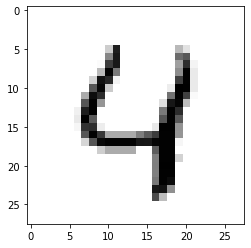

In [87]:
print("Label of this digit is: ", test_labels[4])
plt.imshow(test_images[4,:,:,0], cmap=plt.cm.binary)

### Visualizing the Classification of MNIST Data

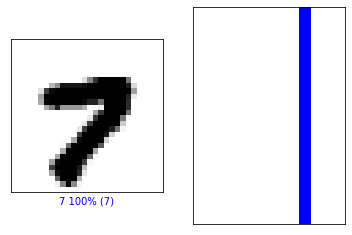

In [88]:
image_index = 79
plt.subplot(1, 2, 1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
mdl.lab2.plot_value_prediction(image_index, predictions, test_labels)

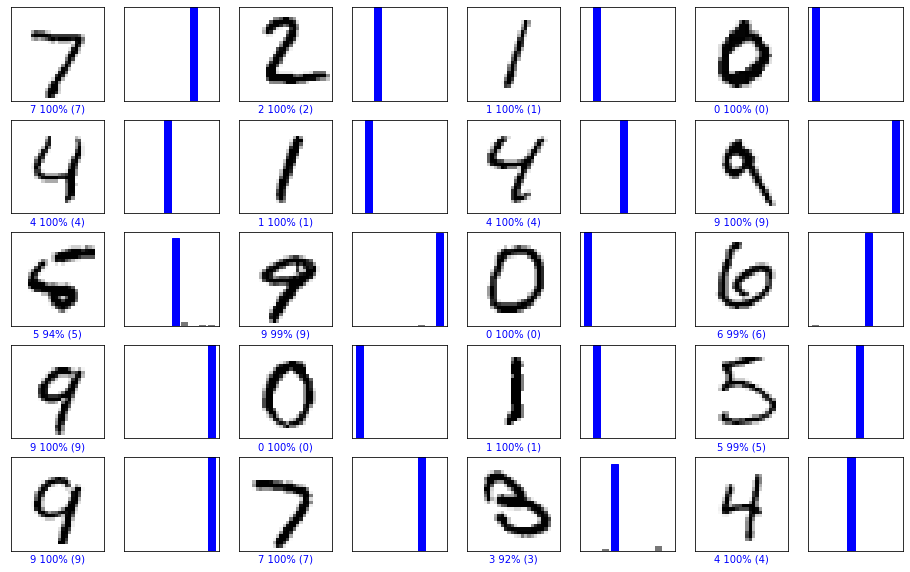

In [89]:
# Visualizing the several images
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

### Optional: Model using Gradient Tape

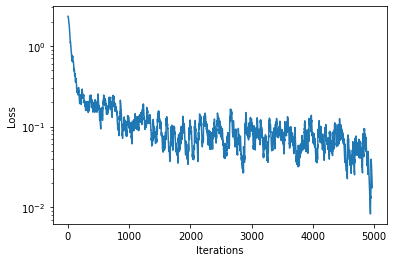

100%|██████████| 5000/5000 [01:16<00:00, 65.45it/s]


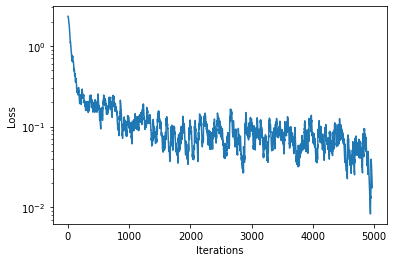

In [92]:
cnn_model = build_cnn_model()
batch_size=12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95)
# Plotter
plotter = mdl.util.PeriodicPlotter(sec=2,
                                   xlabel="Iterations",
                                   ylabel="Loss",
                                   scale="semilogy")
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# Clear
if hasattr(tqdm, '_instances'):tqdm._instances.clear()

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)
  with tf.GradientTape() as tape:
    logits = cnn_model(images)
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)
  
  loss_history.append(loss_value.numpy().mean())
  plotter.plot(loss_history.get())
  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))